In [1]:
#import requests and json

import requests 
import json

In [2]:
#download unique API key
API_KEY = 'RDpwTBJCNfbiNIuRpOXx4p6LcWht1KZunA-ER6K0LCs1-b6UMjMiQ-9sz_r9iE5KQf71s1wwK1LU3r1BW9KIYUScW1pS6WA3PllmX1gVDJXHK4gGi5uGJq39GoaEX3Yx'

#API URL
ENDPOINT = 'https://api.yelp.com/v3/businesses/search'
HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

In [3]:
#Set up parameters
#I chose to look up taco places in Baltimore

PARAMETERS = {'term' : 'tacos',
             'limit' : 50,
             'radius' : 10000,
             'location' : 'Baltimore'}

In [4]:
#set up response

response = requests.get(url = ENDPOINT, params = PARAMETERS, headers = HEADERS)

In [5]:
#put the data from response request into a json file

business_data = response.json()

In [6]:
#import pandas

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

In [7]:
#view the keys of business_data

business_data.keys()

dict_keys(['businesses', 'total', 'region'])

In [8]:
#check the type of business_data

type(business_data['businesses'])

list

In [9]:
#check how many items are in business_data

len(business_data['businesses'])

50

In [10]:
#check longitude of item 15 in dataset

a_business_data = business_data['businesses'][15]
a_business_data['coordinates']['longitude']


-76.574345

In [11]:
# define a function that takes a business dictionary from YELP-API and returns: name, rating, latitude, longtitude, and number of reviews

def get_business_data(a_business_data):
    name = a_business_data['name']
    rating = a_business_data['rating']
    latitude = a_business_data['coordinates']['latitude']
    longitude = a_business_data['coordinates']['longitude']
    numOFreviews = a_business_data['review_count']
   

    return [name, rating, latitude, longitude, numOFreviews]

In [12]:
#see data for item 44

get_business_data(business_data['businesses'][44])

['La China Poblana Restaurant', 4.5, 39.2869148254395, -76.5546035766602, 9]

In [14]:
#load business data and save it

businesses_list = []
for business in business_data['businesses']:
    row = get_business_data(business) 
    businesses_list.append(row)
    
    print(get_business_data(business))

['Tortilleria Sinaloa', 4.5, 39.28581, -76.59251, 372]
['Vida Taco Bar - Baltimore', 4.0, 39.280318, -76.59764, 193]
['Cocina Luchadoras', 4.5, 39.2883838, -76.5933878, 148]
['Clavel', 4.5, 39.314946584723, -76.6203730332442, 711]
['Tijuana Tacos 3', 4.0, 39.2920875549316, -76.5746078491211, 177]
["Papi's Tacos", 4.0, 39.283377, -76.5928519, 477]
['Taco Town', 4.5, 39.2892446828, -76.6216612093, 51]
['Taqueria el Sabor del Parque', 4.0, 39.2860908508301, -76.5756454467773, 110]
['Mi Comalito', 4.0, 39.31336, -76.61637, 123]
['La Cabana', 4.0, 39.2947755, -76.52450017, 12]
['San Pablo Street Tacos', 3.5, 39.298802, -76.614407, 47]
["Papi's Tacos - Hampden", 4.0, 39.33427, -76.63626, 94]
["Cholita's Tacos", 4.0, 39.2959652152407, -76.6190895438194, 69]
['Pop Tacos', 4.5, 39.2765, -76.61351, 179]
['Cinco de Mayo Dos', 4.5, 39.2853751, -76.5985652, 79]
['El Taquito Leon', 4.0, 39.385012, -76.574345, 6]
['Taco Noche Rotunda', 4.0, 39.33571, -76.63049, 2]
['Taqueria El Cabrito', 5.0, 39.2493

In [15]:
# Put data into data frame and name the columns

businessDF = pd.DataFrame(businesses_list, columns = ['Name', 'Rating', 'Latitude', 'Longitude', 'Number_of_Reviews'])

In [16]:
# save data frame as a csv file

businessDF.to_csv('businesses.csv')

In [17]:
#view data and save it as businesses

businesses = pd.read_csv('businesses.csv', index_col= 0)
pd.read_csv('businesses.csv', index_col= 0)

,Name,Rating,Latitude,Longitude,Number_of_Reviews
0,Tortilleria Sinaloa,4.5,39.285810,-76.592510,372
1,Vida Taco Bar - Baltimore,4.0,39.280318,-76.597640,193
2,Cocina Luchadoras,4.5,39.288384,-76.593388,148
3,Clavel,4.5,39.314947,-76.620373,711
4,Tijuana Tacos 3,4.0,39.292088,-76.574608,177
5,Papi's Tacos,4.0,39.283377,-76.592852,477
6,Taco Town,4.5,39.289245,-76.621661,51
7,Taqueria el Sabor del Parque,4.0,39.286091,-76.575645,110
8,Mi Comalito,4.0,39.313360,-76.616370,123
9,La Cabana,4.0,39.294776,-76.524500,12


In [18]:
#check if there are missing values

businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               50 non-null     object 
 1   Rating             50 non-null     float64
 2   Latitude           50 non-null     float64
 3   Longitude          50 non-null     float64
 4   Number_of_Reviews  50 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ KB


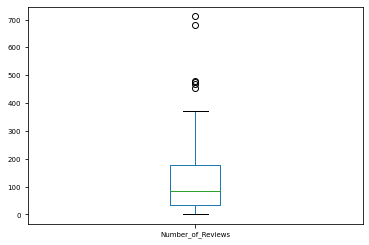

In [19]:
#checking outliers for the Number of Reviews

businesses.Number_of_Reviews.plot(kind = 'box')

In [20]:
#check mean for Number of Reviews

businesses.Number_of_Reviews.mean()

150.8

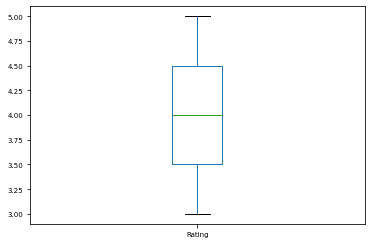

In [21]:
#check outliers Ratings
businesses.Rating.plot(kind = 'box')

In [22]:
#check mean for Ratings

businesses.Rating.mean()

4.02

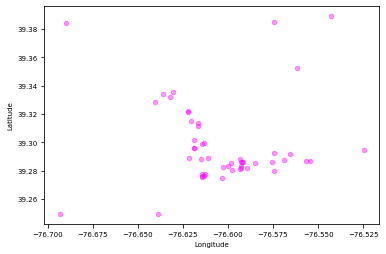

In [23]:
#show where the restaurants are in relation to each other

businesses.plot(kind="scatter", x = "Longitude", y = "Latitude", alpha=0.4, color = "magenta")
plt.show()

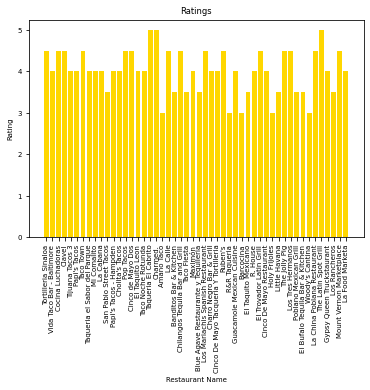

In [24]:
#create bar graph that displays the ratings

plt.bar("Name", "Rating",  data = businesses, color = "gold")
plt.ylabel("Rating")
plt.xlabel("Restaurant Name")
plt.xticks(rotation = 90)
plt.title("Ratings")
plt.show()

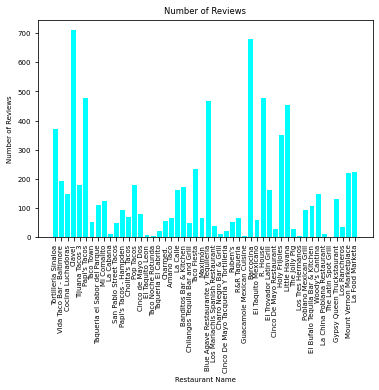

In [25]:
#create bar graph that displays the number of reviews

plt.bar("Name", "Number_of_Reviews",  data = businesses, color = "aqua")
plt.ylabel("Number of Reviews")
plt.xlabel("Restaurant Name")
plt.xticks(rotation = 90)
plt.title("Number of Reviews")
plt.show()